# **Regresión Polinomial**

Se implementa la regresión polinomial para predecir el Cierre de costo de un cierto tiempo que pasa, esto en dólares donde se calcula el precio como objetivo.

In [1]:
#Importamos las librerias para el procesamiento de datos
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import shutil as sh
from sklearn.model_selection import train_test_split


#importando libreria pandas alias pd
import pandas as pd
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
#datatime sirve para poder trabajar con fechas
from datetime import datetime


from sklearn.preprocessing import PolynomialFeatures as Poly

In [24]:
# Cargar datos
data_pol = pd.read_csv('./database_15min_procesado.csv', delimiter=',')

# Mostramos los datos 
data_pol

,date,open_price,maximim_value,minimum_value,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target,close_price
0,20879,4206,4206,4204,5024,211292030,1443,4201,4202,4202,4201,0,0,0,0,0,4200,4206
1,20880,4206,4206,4205,4451,187200190,1175,4202,4202,4202,4201,0,0,0,0,0,4201,4205
2,20881,4205,4206,4203,6515,273933345,1627,4202,4202,4203,4201,0,0,0,0,0,4199,4204
3,20882,4204,4204,4203,2751,115640535,801,4202,4202,4203,4201,0,0,0,0,0,4201,4203
4,20883,4203,4204,4202,3360,141218695,1038,4202,4202,4203,4201,0,0,0,0,0,4207,4202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33073,33066,5197,5197,5196,63,3274000,24,5196,5196,5196,5195,0,0,0,0,0,5197,5197
33074,33067,5196,5197,5196,76,3949415,27,5196,5196,5196,5195,0,0,0,0,0,5197,5197
33075,33068,5197,5198,5197,108,5613470,43,5196,5196,5197,5195,0,0,0,0,0,5198,5198
33076,33069,5197,5198,5197,84,4365980,28,5196,5196,5197,5195,0,0,0,0,0,5197,5197


In [4]:
data_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33078 entries, 0 to 33077
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   date           33078 non-null  int64
 1   open_price     33078 non-null  int64
 2   maximim_value  33078 non-null  int64
 3   minimum_value  33078 non-null  int64
 4   volume         33078 non-null  int64
 5   financial      33078 non-null  int64
 6   negotiations   33078 non-null  int64
 7   mme13          33078 non-null  int64
 8   mme72          33078 non-null  int64
 9   high_mean      33078 non-null  int64
 10  low_mean       33078 non-null  int64
 11  diffMACD       33078 non-null  int64
 12  deaMACD        33078 non-null  int64
 13  MACDlh         33078 non-null  int64
 14  difflh         33078 non-null  int64
 15  dealh          33078 non-null  int64
 16  target         33078 non-null  int64
 17  close_price    33078 non-null  int64
dtypes: int64(18)
memory usage: 4.5 MB


In [25]:
# Dividimos el dataset tanto para el entrenamiento de 80% y la parte de prueba de 20%
train_data, test_data = train_test_split(data_pol, test_size = 0.2, random_state = 42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_poli_test = test_data.drop(['close_price'], axis = 1)
y_poli_test = test_data['close_price']

#Indicamos de que grado sera nuestro polinomio, en este caso de segundo grado
poly = Poly(degree=2)


# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_poli_train = poly.fit_transform(train_data.drop(['close_price'], axis = 1))
X_train = train_data.drop(['close_price'], axis = 1)
y_poli_train = train_data['close_price']
m_poli = len(y_poli_train)

print(len(X_poli_train[1]))

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

171
--------------------------------------------------------------------------------
El 80% de ejemplos que seran para el entrenamiento son: 26462
El 20% de ejemplos que seran para el entrenamiento son: 6616


## **2.1 Normalización de Características**
Viendo los datos da cada caracteristicas se observa que tienen diferentes magnitudes por lo cual normalizamos los datos de cada columna para que tengan valores similares y que el descenso gradiende pueda converger mas rápido.

In [26]:
def plotData(x, y):
  # Grafica los puntos x e y en una figura nueva
  fig = plt.figure() # abre una nueva figura

  plt.plot(x, y, 'ro', ms=10, mec='k')
  plt.xlabel('Información por minutos')
  plt.ylabel('Precios de las acciones')

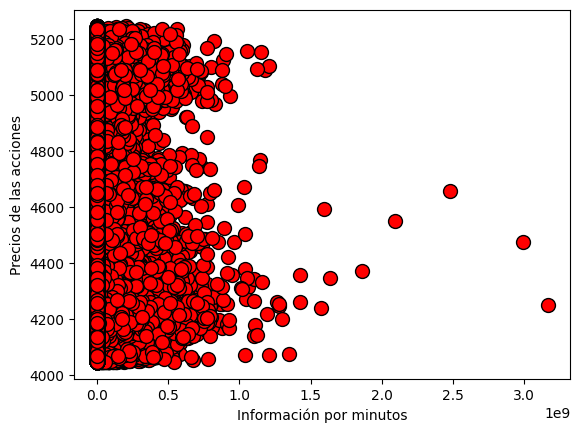

In [6]:
plotData(X_train, y_poli_train)

### Normalizamos los datos de X_poli_train

In [27]:
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # 34, promedio, media
  sigma = np.zeros(X.shape[1])  # desviasión estandar

  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma


In [28]:
# Llamar a la funcion de normalización con los datos cargados
X_poli_norm, mu, sigma = featureNormalize(X_poli_train)

# Mostramos los datos normalizados 
X_poli_norm[:5]

C:\Users\gonza\AppData\Local\Temp\ipykernel_16680\4081456156.py:8: RuntimeWarning: invalid value encountered in divide
  X_norm = (X - mu) / sigma


array([[            nan,  6.20621879e-01, -7.95284789e-01,
        -7.96760777e-01, -7.96163518e-01, -6.85994708e-01,
        -7.06682436e-01, -7.66434320e-01, -7.94507521e-01,
        -7.93313100e-01, -7.96688739e-01, -7.95120033e-01,
         1.13918246e-01, -7.95235785e-02,  1.21374810e-02,
        -4.08189866e-02, -5.68930314e-02, -7.81058837e-01,
         4.29978054e-01,  4.57659300e-01,  4.57088352e-01,
         4.57817594e-01, -4.23071618e-01, -4.48978219e-01,
        -5.44493186e-01,  4.57848573e-01,  4.58379825e-01,
         4.57228690e-01,  4.57996200e-01,  1.00490715e-01,
        -7.81366011e-02,  8.91850368e-03, -4.38788450e-02,
        -5.60347184e-02,  4.60049288e-01, -7.81136588e-01,
        -7.81831060e-01, -7.81556165e-01, -7.08545592e-01,
        -7.20008196e-01, -7.51896782e-01, -7.80806954e-01,
        -7.80374673e-01, -7.81803270e-01, -7.81112221e-01,
         1.19271592e-01, -6.88974453e-02,  1.36289840e-02,
        -3.88716428e-02, -5.53366319e-02, -7.74821347e-0

Despues de normalizar los datos de X caracteristicas la funcion es provada, y se añale el termino de interseccion X_norm

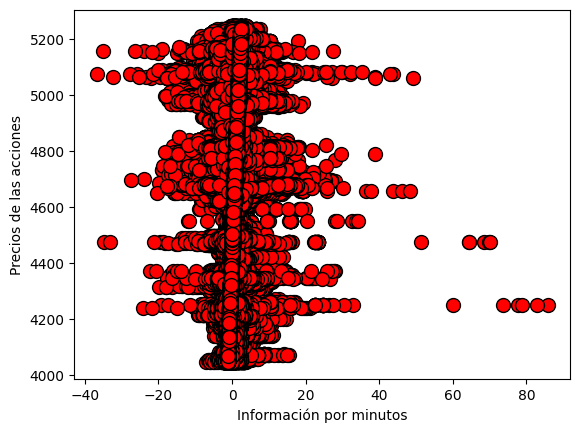

In [10]:
# Graficamos los datos ya normalizados
plotData(X_poli_norm, y_poli_train)

Visualizamos los datos y agregamos la columna de unos

In [34]:
# Añadir el termino de intersección a X
# Columna de unos para X0

X_poli_ready = np.concatenate([np.ones((m_poli, 1)), X_poli_norm], axis=1)

#reemplazamos las columnas de la pocision 0 porque este genera nan
X_poli_ready[:, 1] = 1

# Mostramos los datos 
print(X_poli_ready[:5])


[[ 1.00000000e+00  1.00000000e+00  6.20621879e-01 -7.95284789e-01
  -7.96760777e-01 -7.96163518e-01 -6.85994708e-01 -7.06682436e-01
  -7.66434320e-01 -7.94507521e-01 -7.93313100e-01 -7.96688739e-01
  -7.95120033e-01  1.13918246e-01 -7.95235785e-02  1.21374810e-02
  -4.08189866e-02 -5.68930314e-02 -7.81058837e-01  4.29978054e-01
   4.57659300e-01  4.57088352e-01  4.57817594e-01 -4.23071618e-01
  -4.48978219e-01 -5.44493186e-01  4.57848573e-01  4.58379825e-01
   4.57228690e-01  4.57996200e-01  1.00490715e-01 -7.81366011e-02
   8.91850368e-03 -4.38788450e-02 -5.60347184e-02  4.60049288e-01
  -7.81136588e-01 -7.81831060e-01 -7.81556165e-01 -7.08545592e-01
  -7.20008196e-01 -7.51896782e-01 -7.80806954e-01 -7.80374673e-01
  -7.81803270e-01 -7.81112221e-01  1.19271592e-01 -6.88974453e-02
   1.36289840e-02 -3.88716428e-02 -5.53366319e-02 -7.74821347e-01
  -7.82501614e-01 -7.82248897e-01 -7.08520609e-01 -7.19956618e-01
  -7.51748840e-01 -7.81501307e-01 -7.81072456e-01 -7.82495021e-01
  -7.81808

In [35]:
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

Media calculada: [ 1.00000000e+00  1.65591769e+04  4.46044415e+03  4.46158011e+03
  4.45905812e+03  2.85553862e+03  1.29271761e+08  8.97720392e+02
  4.46003605e+03  4.45899237e+03  4.46136018e+03  4.45863378e+03
 -4.47963117e-01  2.69594135e-01 -1.30753533e-02  7.44841660e-02
  9.74605094e-02  4.46091781e+03  3.65436052e+08  7.42424323e+07
  7.42617769e+07  7.42193613e+07  4.72697443e+07  2.15429379e+12
  1.50460122e+07  7.42358954e+07  7.42185560e+07  7.42574879e+07
  7.42129847e+07 -7.06057713e+03  4.80837915e+03 -1.75757312e+02
  1.49974295e+03  1.80054127e+03  7.42487443e+07  2.00086511e+07
  2.00139826e+07  2.00021774e+07  1.28745193e+07  5.86398185e+11
  4.12843240e+06  2.00067579e+07  2.00017775e+07  2.00129043e+07
  2.00002377e+07 -2.20687072e+03  1.10027719e+03 -7.09560124e+01
  3.40780667e+02  4.56101164e+02  2.00108062e+07  2.00193268e+07
  2.00075078e+07  1.28790805e+07  5.86614126e+11  4.13015209e+06
  2.00120894e+07  2.00071062e+07  2.00182381e+07  2.00055662e+07
 -2.2082

## 2.2 Descenso por el Gradiente

In [30]:
# Declaramos la funcion de costo

def computeCostMulti(X, y, theta):
  # Inicializamos el número de ejemplos de entrenamiento
  m = y.shape[0]

  J = 0
  h = np.dot(X, theta)

  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J

### 2.2.1 Calculo del Costo J(0)

:Ejemplo de funcionamiento de la funcion **calcularCosto** con dos valores diferentes de $\theta$.

In [36]:
# Generar un vector aleatorio entre 0 y 1 con longitud 171
theta_poli = np.random.rand(len(X_poli_ready[1]))
theta_poli2 = np.random.rand(len(X_poli_ready[1]))
print(theta_poli.shape[0])

print("=" * 120)
print(f"con theta:{ theta_poli } se obtiene un costo de: {computeCostMulti(X_poli_ready, y_poli_train, theta_poli)}")
print("=" * 120)
print(f"con theta:{ theta_poli2 } se obtiene un costo de: {computeCostMulti(X_poli_ready, y_poli_train, theta_poli2)}")

172
con theta:[0.79400316 0.91139512 0.68402426 0.08899585 0.39217007 0.43841495
 0.66342387 0.97108252 0.22562818 0.63165716 0.60926145 0.89357317
 0.36161062 0.114841   0.81323206 0.65117641 0.75046657 0.90442711
 0.29694005 0.77962189 0.59951766 0.80208311 0.72442121 0.37504954
 0.71564067 0.65946499 0.4538409  0.07103559 0.42947631 0.19515075
 0.42340029 0.9642808  0.59409435 0.28925886 0.28312701 0.47767441
 0.67020432 0.25749071 0.68638017 0.01753034 0.55034834 0.80281095
 0.42584538 0.71080282 0.2080662  0.12097817 0.71509219 0.10770426
 0.04139069 0.59573881 0.025057   0.8534527  0.20154261 0.32775311
 0.15047765 0.72653508 0.99139908 0.91201703 0.26583008 0.60792541
 0.86160546 0.53912427 0.35930358 0.36586691 0.42511102 0.98015555
 0.94240169 0.87284987 0.18932644 0.5187752  0.43156449 0.06722955
 0.46740242 0.21893612 0.7041843  0.6157297  0.8070125  0.51387998
 0.20383955 0.26750179 0.85236192 0.14781249 0.26835942 0.00761301
 0.96125931 0.02086516 0.89184947 0.17671446 0.8

## 2.3 Descenso por el Gradiente

El costo  J(θ)  esta parametrizado por el vector  θ , no  X  y  y . Donde hay que minimizar el valor de  J(θ)  cambiando los valores del vector  θ . Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de  J(θ)  y verificar si estos decrecen en cada paso.

In [32]:
# Declaramos la función el descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iter):

  m = y.shape[0]
  theta = theta.copy()
  J_history = [] # historial de costo

  for i in range(num_iter):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(computeCostMulti(X, y, theta))

  return theta, J_history


### 2.3.1 Seleccionando coheficientes de aprendizaje

theta calculado por el descenso por el gradiente: [ 2.18375597e+03  2.18375597e+03 -8.48679900e-01  8.00441714e+00
  8.01494259e+00  8.01982443e+00 -6.03394058e-01 -1.34159274e-01
 -2.83944084e-01  7.96233236e+00  7.92099279e+00  7.94289888e+00
  7.95488346e+00 -1.01124489e-02 -3.87478701e-02  9.47124616e-02
  1.52636807e-01  9.58219391e-02  7.94304620e+00 -1.99207157e-01
 -1.08059070e-01 -1.06220095e-01 -1.08137634e-01 -5.59450755e-01
 -3.51832580e-01 -6.83278480e-01 -1.12213201e-01 -1.17201739e-01
 -1.12780200e-01 -1.14255716e-01  2.06556543e-01  7.29488613e-02
  6.62969015e-02 -1.43239610e-01 -2.64292145e-01 -1.13702146e-01
  7.60823741e+00  7.61301915e+00  7.61648111e+00 -8.93309423e-02
  3.30952192e-01  9.87775570e-02  7.58591092e+00  7.56562872e+00
  7.57568681e+00  7.58205064e+00 -1.83663092e-02  3.81368195e-02
  1.29057298e-01  1.35037747e-01  5.58490660e-02  7.57789799e+00
  7.61757872e+00  7.62123855e+00 -8.65866462e-02  3.33361420e-01
  1.00995406e-01  7.59069253e+00  7.5704

Text(0, 0.5, 'Costo de cierre')

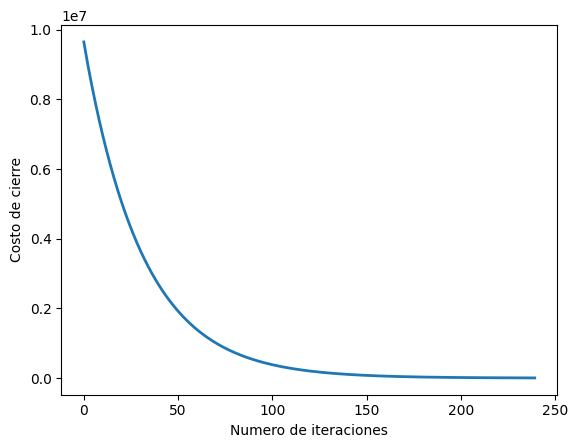

In [53]:

# Elejimos algun valor para alpha (provar varias alternativas)
alpha = 0.008
num_iter = 240


#creamos un theta con 171 columnas de ceros
theta_poli = np.zeros(len(X_poli_ready[1]))
theta_poli, J_history_poli = gradientDescentMulti(X_poli_ready, y_poli_train, theta_poli, alpha, num_iter)


# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta_poli)))
print('El precio de las acciones de la moneda dólar (usando el descenso por el gradiente): ${:.0f}'.format(J_history_poli[-1]))


# Graficar la convergencia de la prediccion a aplicar
print('=' * 100)
print("GRAFICA DE LA CONVERGENCIA")
plt.plot(np.arange(len(J_history_poli)), J_history_poli, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo de cierre')

## 2.4 Gráfica de la regresión polinómica 

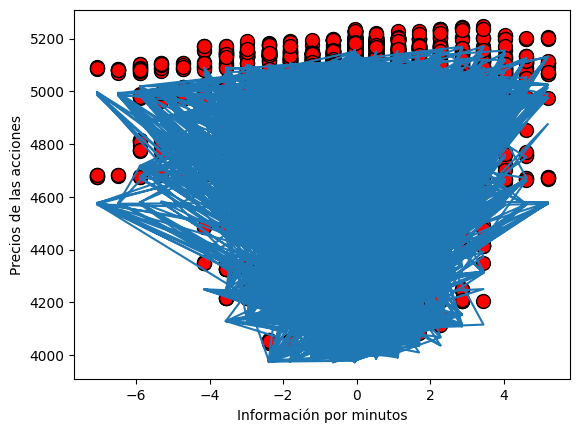

In [54]:
plotData(X_poli_ready[:, 17], y_poli_train)
plt.plot(X_poli_ready[:, 17], np.dot(X_poli_ready, theta_poli), '-')

### 2.4.1 Ejemplos de predicciones 

Aplicaremos con ejemplos del 20% de prueba para predicir los datos

In [63]:
# Declaramos un array donde contendrá los siguientes ejemplos
# Aplicamos la transformación polinómica, no agregamos unos, porque por defecto PolynomialFeatures lo llena de 1
poly_test = Poly(degree=2)
data_poly_test = poly_test.fit_transform(X_poli_test)

# Normalizamos los datos de prueba 
data_poly_test = (data_poly_test - mu) / sigma

# Agregamos la columna de unos (1)
data_poly_test = np.concatenate([np.ones((len(y_poli_test), 1)), data_poly_test], axis=1)

#reemplazamos las columnas de la pocision 0 porque este genera nan
data_poly_test[:, 1] = 1

# declaramos un vector Y_predicha donde se guardaran los resultados
y_pred_poly = np.dot(data_poly_test, theta_poli)


# Mostramos una tabla de DataFrame de los resultados de prediccion con los datos de prueba
y_pred_poly = pd.DataFrame(y_pred_poly, columns=['Precio de cierre'])

data_poly_result = pd.concat([X_poli_test.reset_index(drop=True), y_poli_test.reset_index(drop=True), y_pred_poly], axis=1)
data_poly_result.head(20)

C:\Users\gonza\AppData\Local\Temp\ipykernel_16680\785184171.py:7: RuntimeWarning: invalid value encountered in divide
  data_poly_test = (data_poly_test - mu) / sigma


,date,open_price,maximim_value,minimum_value,volume,financial,negotiations,mme13,mme72,high_mean,low_mean,diffMACD,deaMACD,MACDlh,difflh,dealh,target,close_price,Precio de cierre
0,29270,4253,4254,4253,720,30626535,172,4254,4256,4255,4253,-2,-2,0,0,0,4256,4253,4157.732031
1,19276,4390,4390,4389,1953,85731310,478,4390,4391,4390,4389,0,0,0,0,0,4391,4389,4288.962322
2,4003,4648,4650,4648,884,41102050,304,4649,4645,4651,4647,3,3,0,0,0,4649,4649,4546.693867
3,29562,4213,4213,4211,3927,165409670,1167,4212,4207,4213,4211,4,4,0,1,1,4211,4212,4118.401659
4,10642,4144,4142,4142,2342,97028400,535,4142,4140,4143,4142,2,3,0,0,0,4142,4143,4058.727411
5,11839,4785,4786,4783,1097,52489400,594,4787,4783,4789,4786,0,0,0,0,0,4808,4785,4687.252372
6,6896,4085,4085,4085,762,31128610,183,4084,4080,4085,4084,4,3,0,1,1,4082,4085,4006.774085
7,25727,4214,4215,4214,873,36796000,213,4215,4215,4216,4215,0,0,0,0,0,4219,4214,4122.518573
8,10484,4122,4120,4120,5599,230793410,1727,4119,4113,4121,4118,6,0,0,1,1,4126,4123,4039.574245
9,13012,4309,4309,4308,801,34510375,187,4309,4310,4309,4308,-1,0,0,0,0,4305,4308,4212.508355


## 2.4.2 Validación

Para hacer las validaciones correspondientes, se hizo el uso Mean squeared error

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [64]:
# Creamos la function del error cuadratico medio
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta**2)
    return err_cuadrado / len(y_pred)

In [69]:
# Calculo de error cuadrático medio 
m_poli = len(y_poli_test)

# Aplicamos la transformación polinómica, no agregamos unos, porque por defecto PolynomialFeatures lo llena de 1
poly = Poly(degree=2)
df_poly_test = poly.fit_transform(X_poli_test)

# Normalizamos los datos de X_poly_test
df_poly_norm = (df_poly_test - mu) / sigma

# Contatenamos con la columna de unos 
df_poly_ready = np.concatenate([np.ones((m_poli, 1)), df_poly_norm], axis=1)

#reemplazamos las columnas de la pocision 0 porque este genera nan
df_poly_ready[:, 1] = 1

#creamos un array que almacenara cada una de las y_predicha
y_predicha_poly = np.dot(df_poly_ready, theta_poli)

mse = mean_squared_error(y_predicha_poly, y_poli_test)

#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 8672.76483086555
Raíz del Error Cuadrático Medio (RMSE) = 93.12768026137852


C:\Users\gonza\AppData\Local\Temp\ipykernel_16680\984398802.py:9: RuntimeWarning: invalid value encountered in divide
  df_poly_norm = (df_poly_test - mu) / sigma


# 3 Ecuación de la Normal

Hacemos uso de la funcion de la Normal, haremos uso de los datos cargados en X para garantizar que las variables no esten modificadas, se debe agregar la columna de unos a la matriz  X  para tener el termino de intersección.

La ecuación de la normal se aplica para que la convergencia sea mas rapido en el calculo de la regresión.

In [70]:
# Definimos la ecuación de la normal
def ecuacionNormal(X, y):

  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

  return theta

In [72]:
# Seleccionar aleatoriamente 20,000 ejemplos
sampled_dataset = data_pol.sample(n=20000, random_state=42)

#? Dividimos el 80% y el 20% tanto para el entrenamiento y la prueba 
train_dataset, test_dataset = train_test_split(sampled_dataset, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
# X_test que es el 20% para la parte de la prueba
X_ecuaNormal_test = test_dataset.drop(['close_price'], axis = 1)
y_ecuaNormal_test = test_dataset['close_price']

# X_train del 80% para la parte del entrenamiento
X_ecuaNormal_train = train_dataset.drop(['close_price'], axis = 1)
y_ecuaNormal_train = train_dataset['close_price']
m_poli = len(y_ecuaNormal_train)

In [76]:
# Concatenamos con la columna de unos 
X_ecuaNormal_ready = np.concatenate([np.ones((m_poli, 1)), X_ecuaNormal_train], axis=1) 

# Calculamos los parámetros con la ecuación de la normal
tethas_enorm = ecuacionNormal(X_ecuaNormal_ready, y_ecuaNormal_train)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuacióon de la normal
print('Thetas calculado a partir de la ecuación de la normal: {:s}'.format(str(tethas_enorm)))

Thetas calculado a partir de la ecuación de la normal: [ 8.03035992e-01  1.86228803e-06  2.21046185e-01  1.95016405e-01
  3.84071976e-01 -9.23183812e-05  8.94497713e-10  2.50577536e-04
  4.70527603e-01 -2.52979229e-02 -2.60164739e-02 -2.41685647e-01
  2.84081212e-02 -3.06102405e-02  2.24488659e-01  9.56703701e-02
 -1.13553973e-01  2.21484229e-02]


### 3.1 Realizamos algunas predicciones 

In [77]:

# Estimar los Costos de cierre o precio por acciones con los siguientes datos
X_array = [1, 20879,	4206,	4206, 4205,	4451,	18720019,	1175,	4202,	4202,	4202,	4201,	0,	0,	0,	0,	4201,	4205]
price = np.dot(X_array, tethas_enorm)
print('Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : ${:.0f}'.format(price))

Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : $3728


## 3.2 Validaciones

Para hacer las validaciones correspondientes, primero se crea la funcion del Mean squeared error

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba

In [80]:
m_ecn_test = len(y_ecuaNormal_test)

# Contatenamos con columna de unos al X_test
X_ecuaNormal_test = np.concatenate([np.ones((m_ecn_test, 1)), X_ecuaNormal_test], axis=1)

# Cuardamos todos los datos en un array de y_predicha 
y_predicha_ecuaNorm = np.dot(X_ecuaNormal_test, tethas_enorm)

#calculamos el error cuadratico medio:
mse = mean_squared_error(y_predicha_ecuaNorm, y_ecuaNormal_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 2.933667926753975
Raíz del Error Cuadrático Medio (RMSE) = 1.7127953546042725
